# ARIMA Study

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sktime.forecasting.arima import AutoARIMA
import pmdarima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Setting Seaborn as default style

### The ways to fit an ARIMA model using Python

1. statsmodels.tsa.arima.model.ARIMA
2. pmdarima.arima.ARIMA
3. pmdarima.auto_arima
4. sktime.forecasting.arima.AutoARIMA (uses pmdarima.auto_arima under the hood)

In [2]:
np.random.seed(123)
dates = pd.date_range(start='2020-01-01', end='2020-01-14', freq='D')

data = np.array([i for i in range(len(dates))])
noise = np.random.normal(loc=0, scale=1, size=len(dates))

df = pd.DataFrame(data+noise, index=dates, columns=['value'])
df

,value
2020-01-01,-1.085631
2020-01-02,1.997345
2020-01-03,2.282978
2020-01-04,1.493705
2020-01-05,3.421400
2020-01-06,6.651437
2020-01-07,3.573321
2020-01-08,6.571087
2020-01-09,9.265936
2020-01-10,8.133260


In [3]:
model_1 = ARIMA(df['value'], order=(1,1,1))
model_fit = model_1.fit()

pred_1 = model_fit.predict()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   14
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -28.620
Date:                Mon, 15 Jul 2024   AIC                             63.239
Time:                        11:45:33   BIC                             64.934
Sample:                    01-01-2020   HQIC                            62.891
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0009      2.527      0.000      1.000      -4.952       4.954
ma.L1         -0.1383      2.608     -0.053      0.958      -5.249       4.973
sigma2         4.7763      3.359      1.422      0.1

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [5]:
forecast_1 = model_fit.forecast(steps=5)
print(forecast_1)

2020-01-15    12.462679
2020-01-16    12.462774
2020-01-17    12.462774
2020-01-18    12.462774
2020-01-19    12.462774
Freq: D, Name: predicted_mean, dtype: float64


In [6]:
model_2 = pmdarima.auto_arima(df['value'])
model_2.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/opt/ho

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(4, 1, 1)   Log Likelihood                 -13.842
Date:                Mon, 15 Jul 2024   AIC                             41.684
Time:                        11:45:58   BIC                             45.639
Sample:                    01-01-2020   HQIC                            40.871
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8336      1.854      4.765      0.000       5.200      12.467
ar.L1         -2.1043      0.350     -6.013      0.000      -2.790      -1.418
ar.L2         -2.6216      0.332     -7.906      0.000      -3.272      -1.972
ar.L3         -1.9798      0.367     -5.394      0.000      -2.699      -1.260
ar.L4         -0.8487      0.237     -3.579      0.000      -1.313      -0.384
ma.L1          0.7147      1.653      0.432      0.666      -2.526       3.955
sigma2         0.2784      0.152      1.831      0.067      -0.020       0.576
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.73   Prob(JB):                         0.34
Heteroskedasticity (H):               0.81   Skew:                            -0.92
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
pred_2 = model_2.predict_in_sample()
forecast_2 = model_2.predict()

In [12]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='D')

In [15]:
np.array(pred_1.index)

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [13]:
type(pred_1.values)

numpy.ndarray

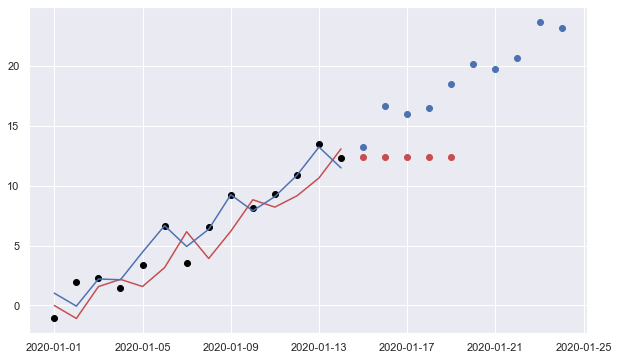

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df.index, df['value'], label='Original', c='black')

plt.plot(np.array(pred_1.index), pred_1.values, label='Fitted ARIMA', c='r')
plt.scatter(forecast_1.index, forecast_1.values, label='ARIMA', c='r')

plt.plot(np.array(pred_2.index), pred_2.values, label='Fitted auto ARIMA', c='b')
plt.scatter(forecast_2.index, forecast_2.values, label='auto ARIMA', c='b')

## Let's see how different orders ARIMAs perform

### First, let's see how the model predictions change when we vary the auto-regressive component, AR.
AR represents the number of past values we consider in our ARIMA formula.

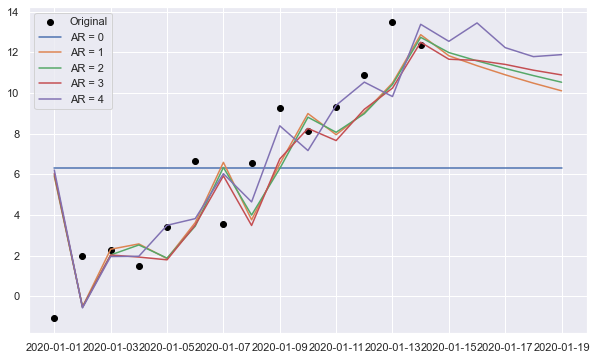

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['value'], label='Original', c='black')

for i in range(5):
    model = ARIMA(df['value'], order=(i, 0, 0))
    model_fit = model.fit()
    # In-sample prediction
    pred = model_fit.predict()
    # Forecast the next 5 days
    forecast = model_fit.forecast(steps=5)
    # Plot predictions
    plt.plot(
            list(pred.index) + list(forecast.index),
            list(pred.values) + list(forecast.values),
            label = f'AR = {i}'
    )
    plt.legend()


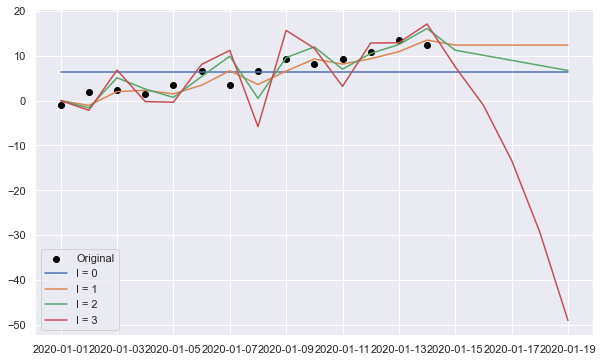

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['value'], label='Original', c='black')

for i in range(4):
    model = ARIMA(df['value'], order=(0, i, 0))
    model_fit = model.fit()
    # In-sample prediction
    pred = model_fit.predict()
    # Forecast the next 5 days
    forecast = model_fit.forecast(steps=5)
    # Plot predictions
    plt.plot(
            list(pred.index) + list(forecast.index),
            list(pred.values) + list(forecast.values),
            label = f'I = {i}'
    )
    plt.legend()

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


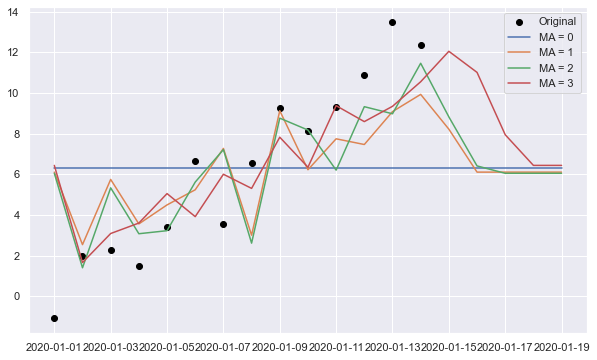

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['value'], label='Original', c='black')

for i in range(4):
    model = ARIMA(df['value'], order=(0, 0, i))
    model_fit = model.fit()
    # In-sample prediction
    pred = model_fit.predict()
    # Forecast the next 5 days
    forecast = model_fit.forecast(steps=5)
    # Plot predictions
    plt.plot(
            list(pred.index) + list(forecast.index),
            list(pred.values) + list(forecast.values),
            label = f'MA = {i}'
    )
    plt.legend()